# SVM (Support Vector Machine) example

## Random split
### What Techniques to Use When: 
https://machinelearningmastery.com/evaluate-performance-machine-learning-algorithms-python-using-resampling/

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('data.csv') 
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [3]:
# Handling Missing Values

from sklearn.preprocessing import Imputer #class
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) # an instance of the class with these properties
imputer = imputer.fit(X[:, 0:2])         # we have to choose the columns with missing values
X[:, 0:2] = imputer.transform(X[:, 0:2])           # replace the X values for the columns averages

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)  
                     # random_state -> random, but a fixed random.

# Feature Scaling
from sklearn.preprocessing import StandardScaler # x_stand = (x-mean(x))/std(x)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# =============================================================================
# from sklearn.preprocessing import MinMaxScaler # Normalizál x_norm = (x- min(x))/(max(x)-min(x))
# sc = MinMaxScaler(feature_range=(0, 1))
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# =============================================================================

"""
End of data processing part.
"""

'\nEnd of data processing part.\n'

In [4]:
# Fitting SVM classifier to the Training set
from sklearn.svm import SVC # this is a class
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(X_train, y_train)    # This practically compels Xs with y-ones

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [5]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

precision, recall, fscore, support = score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-score: {}'.format(fscore))
print('Support: {}'.format(support))

Accuracy: 0.93
Precision: [ 0.95522388  0.87878788]
Recall: [ 0.94117647  0.90625   ]
F-score: [ 0.94814815  0.89230769]
Support: [68 32]


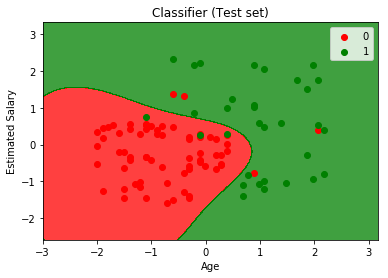

In [6]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()